In [1]:
%matplotlib notebook

In [2]:
from nn_adapt.plotting import *
import numpy as np

Gather data for a typical uniform refinement run

In [3]:
uni_time = np.load("turbine/data/times_uniform_aligned.npy")[3]
uni = {
    "Forward solve": 0.9414,
    "Adjoint solve": 0.0,
    "Error estimation": 0.0,
    "Metric construction": 0.0,
    "Mesh adaptation": 0.0039,
}
uni["Other"] = 1.0 - sum(uni.values())
assert np.isclose(sum(uni.values()), 1.0)
for key in uni:
    uni[key] *= uni_time

Gather data for a typical goal-oriented run

In [4]:
go_time = np.load("turbine/data/times_GOanisotropic_aligned.npy")[2]
go = {
    "Forward solve": 0.2420,
    "Adjoint solve": 0.1294,
    "Error estimation": 0.4979,
    "Metric construction": 0.0951,
    "Mesh adaptation": 0.0046,
}
go["Other"] = 1.0 - sum(go.values())
assert np.isclose(sum(go.values()), 1.0)
for key in go:
    go[key] *= go_time

Gather data for a typical data-driven run

In [5]:
ml_time = np.load("turbine/data/times_MLanisotropic_aligned.npy")[2]
ml = {
    "Forward solve": 0.3864,
    "Adjoint solve": 0.2144,
    "Error estimation": 0.1952 + 0.0090,
    "Metric construction": 0.1313,
    "Mesh adaptation": 0.0067,
}
ml["Other"] = 1.0 - sum(ml.values())
assert np.isclose(sum(ml.values()), 1.0)
for key in ml:
    ml[key] *= ml_time

Plot as a stacked bar chart

<IPython.core.display.Javascript object>


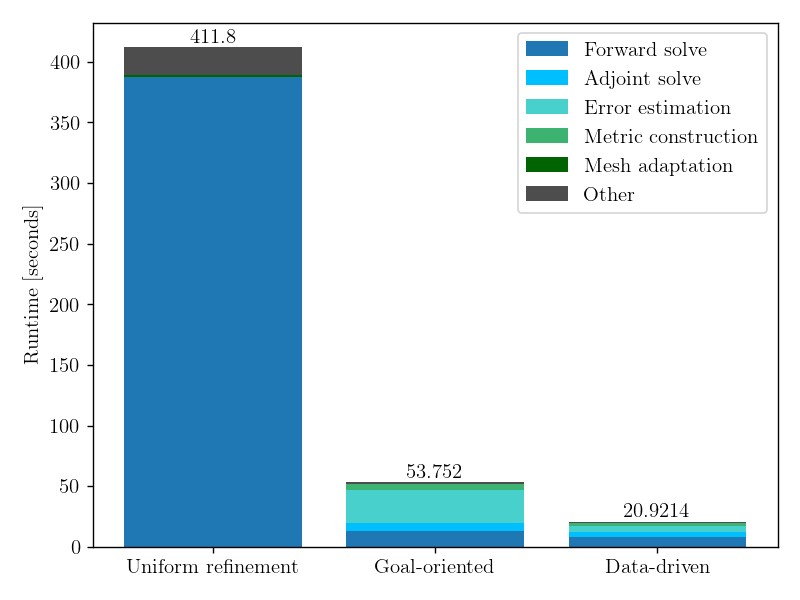

In [6]:
fig, axes = plt.subplots()
x = ["Uniform refinement", "Goal-oriented", "Data-driven"]
colours = ["C0", "deepskyblue", "mediumturquoise", "mediumseagreen", "darkgreen", "0.3"]
bottom = np.zeros(len(x))
for i, key in enumerate(go.keys()):
    arr = np.array([d[key] for d in [uni, go, ml]])
    axes.bar(x, arr, bottom=bottom, label=key, color=colours[i])
    bottom += arr
axes.bar_label(axes.containers[-1])
axes.legend(loc="upper right")
axes.set_ylabel("Runtime [seconds]")
plt.tight_layout()
plt.savefig("turbine/plots/timings.pdf")